# Simple Linear Regression Assignment¶
# Data Set- Salary_Data(1).csv

# Salary_hike -> Build a prediction model for Salary_hike

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hike = pd.read_csv('C:\\Users\\SUBRAT PATRA\\Downloads\\Salary_Data (1).csv')

In [3]:
hike.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Null values checking

In [4]:
hike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


There is no null value present in side the salary data set and also data types are appropriate in all attributes

# Correlation

In [5]:
hike.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# Duplicates

In [6]:
#Print the duplicated rows
hike[hike.duplicated(keep = False)]

,YearsExperience,Salary


There is no duplicate data present in side the data set

# Check whether outliers are present inside the data or not

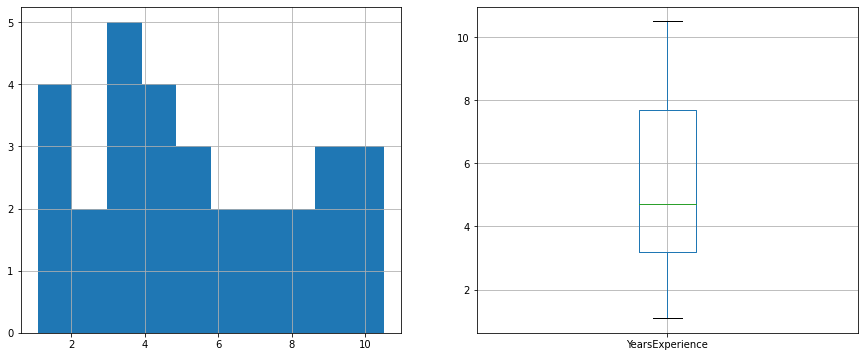

In [7]:
#checking whether outliers are present in YrExp column
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
hike['YearsExperience'].hist()
plt.subplot(1,2,2)
hike.boxplot(column=['YearsExperience'])

plt.show()

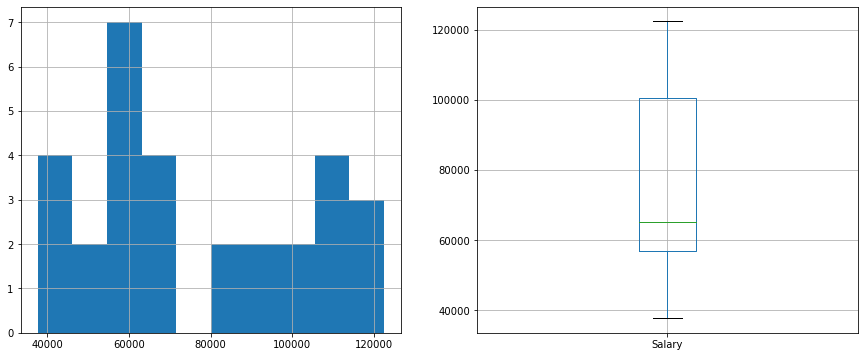

In [8]:
#checking whether outliers are present in Salary column
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
hike['Salary'].hist()
plt.subplot(1,2,2)
hike.boxplot(column=['Salary'])

plt.show()

In [ ]:
From the above plots, we found that there is no outleirs present inside the YearsExperience and Salary data column

# Checking distribution of data using distplot

C:\Users\SUBRAT PATRA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

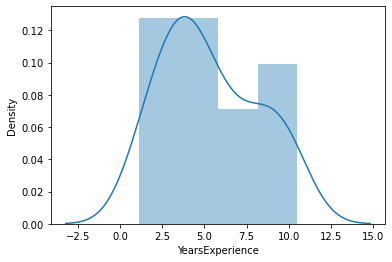

In [9]:
import seaborn as sns
sns.distplot(hike['YearsExperience'])

C:\Users\SUBRAT PATRA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

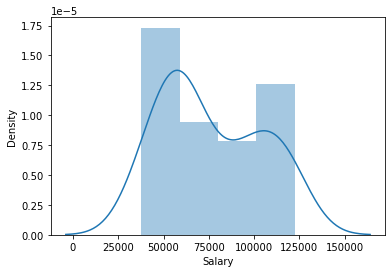

In [10]:
import seaborn as sns
sns.distplot(hike['Salary'])

# Predict a model without applying transformation

In [13]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience",data = hike).fit()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

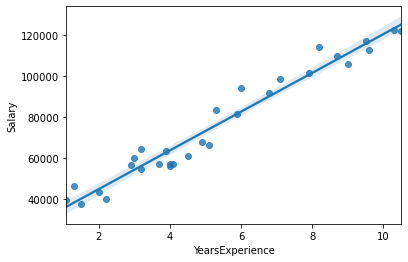

In [11]:
sns.regplot(x="YearsExperience", y="Salary", data = hike)

# Coefficients 

In [14]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [15]:
#t & p-values
print(model.tvalues, '\n', model.pvalues)  

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [16]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 23 Jan 2021   Prob (F-statistic):           1.14e-20
Time:                        20:48:01   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As per above OLS Regression Results dependent variable is salary and here p value is less than 0.05 hence this is significant model.
Here R-squred value is 0.957, which is greater than 0.8. Hence we can say our model is good for Salary_hike.

# RMSE

In [19]:
pred = model.predict(hike.YearsExperience)
pred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [20]:
actual = hike.Salary

In [21]:
from ml_metrics import rmse
rmse(pred,actual)

5592.043608760662

# Model1
We can apply transformation on variables to get a better R-squared value for to predict a better model.
Applying Logarithmic Transformation and Predict a new model.

In [22]:
model1 = smf.ols("Salary~np.log(YearsExperience)",data = hike).fit()

In [23]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sat, 23 Jan 2021   Prob (F-statistic):           3.25e-13
Time:                        20:53:41   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Checking of RMSE value of the new model1

In [24]:
pred1 = model1.predict(hike.YearsExperience)
pred1

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

In [25]:
rmse(pred1,actual)

10302.893706228306

Here after applying logarithmic transformation on YearsExperience varibale, from Model1 we get thatth R-squared value is 0.854 and p value is less than 0.05.
Conclusion - Comparing between model and model1 , model has higher R-squared value i.e. 0.957 as comapare to model1. And also RMSE value is lower in model as compare to model1.
From the above data we know higher R-squred value and lower RMSE value gives better model.
Hence the first model i.e. model is better model to predict Salary_hike